In [1]:
!unzip -q "/content/sample_data/FruitinAmazon (1).zip"

# Simple CNN Implemented using Keras.

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random

In [3]:
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

In [7]:
# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [8]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.5632 - loss: 1.2491 - val_accuracy: 0.9195 - val_loss: 0.2645
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9202 - loss: 0.2567 - val_accuracy: 0.9508 - val_loss: 0.1684
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9512 - loss: 0.1598 - val_accuracy: 0.9635 - val_loss: 0.1176
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9654 - loss: 0.1137 - val_accuracy: 0.9712 - val_loss: 0.0898
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9720 - loss: 0.0919 - val_accuracy: 0.9758 - val_loss: 0.0745


In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9708 - loss: 0.0892
Test accuracy: 0.9758


In [11]:
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# Task 2: Loading and Preprocessing Image Data in keras:

In [40]:
# Define the directories
train_dir = "/content/FruitinAmazon/train"
test_dir = "/content/FruitinAmazon/test"

# Get the class names from the training directory
classes = sorted(os.listdir(train_dir))

In [42]:
# Print the number of images in each class
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class {class_name}: {num_images} images")


Class acai: 15 images
Class cupuacu: 15 images
Class graviola: 15 images
Class guarana: 15 images
Class pupunha: 15 images
Class tucuma: 15 images


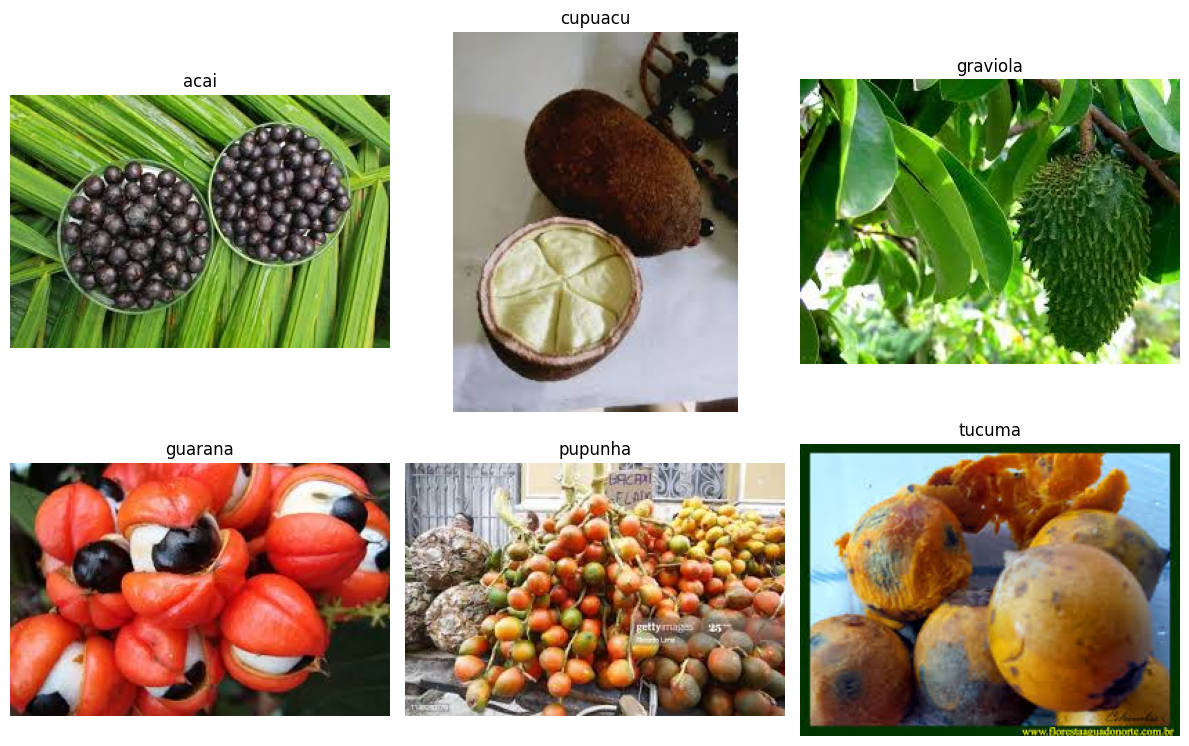

In [49]:
# Visualize a random sample image from each of the first 6 classes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

for i, class_name in enumerate(classes[:6]):  # Show 6 sample images
    class_path = os.path.join(train_dir, class_name)
    sample_image = random.choice(os.listdir(class_path))  # Pick a random image
    img = Image.open(os.path.join(class_path, sample_image))

    # Calculate row and column indices
    row = i // 3
    col = i % 3

    axes[row, col].imshow(img)
    axes[row, col].set_title(class_name)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

# Check for Corrupted Image:

In [50]:
import os
import shutil
from PIL import Image



# Initialize a list to keep track of corrupted images
corrupted_images = []

# Iterate through each class subdirectory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    # Ensure it is a directory
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                # Attempt to open the image
                with Image.open(image_path) as img:
                    img.verify()  # Verify that it is a valid image
            except (IOError, SyntaxError) as e:
                # If the image is corrupted, remove it
                os.remove(image_path)
                corrupted_images.append(image_path)
                print(f"Removed corrupted image: {image_path}")

# Print the final message
if not corrupted_images:
    print("No corrupted images found.")

No corrupted images found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [52]:
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation

In [53]:
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]

In [54]:
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset="training",
seed=123
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [55]:
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

In [56]:
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset="validation",
seed=123
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [57]:
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

In [58]:
# Define the number of output classes
num_classes = 6  # Adjust this based on your dataset

# Define the CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same"),
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Network
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,374 (587.40 KB)

 Trainable params: 150,374 (587.40 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6148 - loss: 1.0516 - val_accuracy: 0.6333 - val_loss: 1.0342
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6840 - loss: 0.8457 - val_accuracy: 0.6222 - val_loss: 1.1725
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6871 - loss: 0.8430 - val_accuracy: 0.6778 - val_loss: 1.0282
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7556 - loss: 0.7035 - val_accuracy: 0.6222 - val_loss: 0.9230
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8188 - loss: 0.5118 - val_accuracy: 0.6778 - val_loss: 0.7577


In [65]:
 # Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4438 - loss: 1.2585
Test Loss: 1.2878382205963135, Test Accuracy: 0.41111111640930176


In [66]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [68]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_names, output_dict=True)
print("Classification Report:")
for class_name, metrics in report.items():
    if class_name == 'accuracy':
        continue
    print(f"Class: {class_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")
    print()

# Print overall metrics
print("Overall Metrics:")
print(f"Accuracy: {report['accuracy']:.2f}")
print(f"Macro Average Precision: {report['macro avg']['precision']:.2f}")
print(f"Macro Average Recall: {report['macro avg']['recall']:.2f}")
print(f"Macro Average F1-Score: {report['macro avg']['f1-score']:.2f}")
print(f"Weighted Average Precision: {report['weighted avg']['precision']:.2f}")
print(f"Weighted Average Recall: {report['weighted avg']['recall']:.2f}")
print(f"Weighted Average F1-Score: {report['weighted avg']['f1-score']:.2f}")

Classification Report:
Class: acai
  precision: 0.46
  recall: 0.80
  f1-score: 0.59
  support: 15.00

Class: cupuacu
  precision: 0.00
  recall: 0.00
  f1-score: 0.00
  support: 15.00

Class: graviola
  precision: 0.77
  recall: 0.67
  f1-score: 0.71
  support: 15.00

Class: guarana
  precision: 0.33
  recall: 1.00
  f1-score: 0.50
  support: 15.00

Class: pupunha
  precision: 0.00
  recall: 0.00
  f1-score: 0.00
  support: 15.00

Class: tucuma
  precision: 0.00
  recall: 0.00
  f1-score: 0.00
  support: 15.00

Class: macro avg
  precision: 0.26
  recall: 0.41
  f1-score: 0.30
  support: 90.00

Class: weighted avg
  precision: 0.26
  recall: 0.41
  f1-score: 0.30
  support: 90.00

Overall Metrics:
Accuracy: 0.41
Macro Average Precision: 0.26
Macro Average Recall: 0.41
Macro Average F1-Score: 0.30
Weighted Average Precision: 0.26
Weighted Average Recall: 0.41
Weighted Average F1-Score: 0.30


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


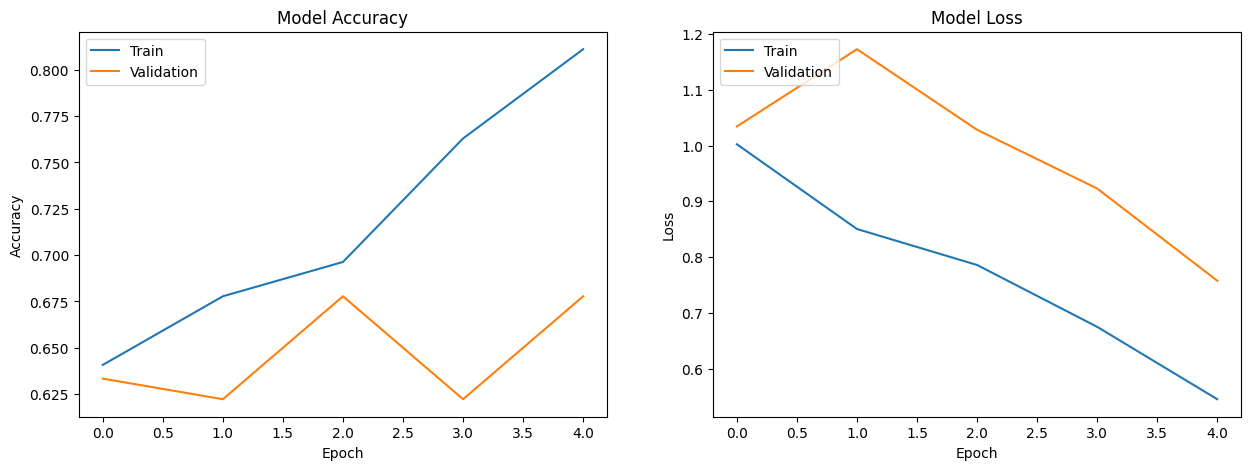

In [71]:
# Visualization: Graphs showing training and validation loss and accuracy
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()